# Mining Twitter (Based on Chapter 2 of the book 'Mastering...')

In this notebook you will learn the basic concepts of twitter mining and will try to gather some data from Twitter. Follow the steps, and do the exercises in a copy of this notebook. For that, click in *File -> Make a copy...* button. Rename it using your names.

To include a new cell in the notebook, click on the plus sign on the toolbar, or tipe *Alt+Enter* to execute the current cell and create a new one. You can also click on the *Cell* menu.

## Tweepy, Json and Python

To collect data and make it readable, two libraries will be used. Tweepy is a library that embed the twitter API functions making it easier to interact with the Twitter server.

Json is the format that the data is extracted from Twitter. For this reason, the library Json is also important.

## Create your own key at Twitter webpage
You need your own keys to have access to Twitter API. For that, go to https://apps.twitter.com/ then create a new App, and generate the keys. 

In case you have problems, watch the 5 first minutes of https://www.youtube.com/watch?v=pUUxmvvl2FE


## Put your keys here!

The variables where you should put your keys are below. So copy and paste all the 4 keys and paste them below.

The first part of this notebook shows you the Tweepy library being loaded, together with the os and sys libraries. Those are used to check files at your system and yield system messages in case it is necessary.

The two functions basically will read your tokens and keys and generate an object that can communicate with Twitter and ask for data. Don't be scared at first moment! Those functions are default for all twitter applications, and are very ugly, indeed. 

In [4]:
import os
import sys
from tweepy import API
from tweepy import OAuthHandler

In [5]:
def get_twitter_auth():
    """Setup Twitter authentication.

    Return: tweepy.OAuthHandler object
    """
    try:
        consumer_key = '6mmCmb6uIoHeVZyW8Oe3NGgTi'# os.environ['TWITTER_CONSUMER_KEY']
        consumer_secret = 'vpW8n1YdIVK3aWrfrSDVl60B5zVwSa8TN7EP5OhCEEPHQEqmng' # os.environ['TWITTER_CONSUMER_SECRET']
        access_token = '40952530-0OuykTLY5hd41qXficaxIDymKtVqZXMcvXRRmny3u' # os.environ['TWITTER_ACCESS_TOKEN']
        access_secret = '69xT9o30ukFgtQyjnwuhhbvR1HvmkfLgn2YRo0vKIEeOU' # os.environ['TWITTER_ACCESS_SECRET']
    except KeyError:
        sys.stderr.write("TWITTER_* environment variables not set\n")
        sys.exit(1)    
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    return auth

In [6]:
def get_twitter_client():
    """Setup Twitter API client.

    Return: tweepy.API object
    """
    auth = get_twitter_auth()
    client = API(auth)
    return client

## Getting tweets from your timeline
So the first thing I'm gonna do is to read my own tweets from my own timeline. For that, I'll use more stuff from Tweepy (the cursor) and also the library Json. The data dumped on us after we request something to Python API is in Json format. If you wanna learn more about that, feel free to enjoy http://www.w3schools.com/js/js_json_intro.asp

In [7]:
import json
from tweepy import Cursor

As you can see below there is no need for changes in the code. the client.home_timeline is the query for the Cursos, that will return 200 times 4 = 800 tweets from your home (that is the maximum you can get from your own timeline).

**Notice** that a file named home_timeline.jsonl will be generated on the same folder as you saved this notebook! You can open this file to see a very messy information about all your tweets (one per line).

In [8]:
client = get_twitter_client()

with open('home_timeline.jsonl', 'w') as f:
    for page in Cursor(client.home_timeline, count=200, include_rts=True).pages(4):
        for status in page:
            # Process a single status
            f.write(json.dumps(status._json)+"\n")

## Activity 1

Open the file called home_timeline.jsonl and read it. Use a text editor for that, like Gedit (Linux), Notepad (Windows) or TextEdit (Mac OSx).
1. What kind of information do you see in the file?
2. Can you get your tweets from the file? If yes, how?
3. Can you say what is the code doing by just reading the lines?

## Getting tweets from another user's timeline
You can also get information about another user's timeline. And the good news are: you can get more than the 800 tweets you got before! But now you have to give the username of the twitter account you wanna take the tweets. We will read 3200 tweets from VUamsterdam account.

In [9]:
user = 'VUamsterdam'
fname = "user_timeline_{}.jsonl".format(user)
with open(fname, 'w') as f:
    for page in Cursor(client.user_timeline, screen_name=user, count=200).pages(16):
        for status in page:
            f.write(json.dumps(status._json)+"\n")

## Good to know!
Using the Cursos to find tweets from your own account gives you a limit of 800 tweets maximum. When you use the second function, finding the tweets in a user timeline, this limit increaes to 3200.

It is also good to know the structure of a tweet. In our code above the *_json* attribute is the one saved in the file. This attribute contains all the information from the tweet in a Json format. The Json format is useful to keep the structure of the information to be saved, and it is the same as a dictionary. In our case, we are creating a jsonl file, or a list of jsons, because every line corresponds to the information of a tweet.

## Entity Analysis

Now that we can get the tweets in a timeline, we can also extract the hashtags and produce the list with the more common ones.

Remember that you have to change the name of your input (fname) if you are investigating another account!

In [10]:
from collections import Counter

def get_hashtags(tweet):
    entities = tweet.get('entities', {})
    hashtags = entities.get('hashtags', [])
    return [tag['text'].lower() for tag in hashtags]

In [11]:
# The file previously created
fname = 'user_timeline_VUamsterdam.jsonl'
with open(fname, 'r') as f:
    hashtags = Counter()
    for line in f:
        tweet = json.loads(line)
        hashtags_in_tweet = get_hashtags(tweet)
        hashtags.update(hashtags_in_tweet)
    for tag, count in hashtags.most_common(20):
        print("{}: {}".format(tag, count))

vuconferentie: 84
wvdw: 84
opendagvu: 74
ech2016: 70
oaj15: 51
diesvu: 51
vu: 45
s4sconference: 42
vuevent: 41
oaj16: 22
sustainability: 21
vumag: 21
cleansea: 19
vumasterdag: 16
zwaartekrachtsgolven: 15
terugkijktip: 15
rio2016: 12
meddeaths: 12
amsterdam: 12
criminologie: 11


### Going deeper...

We can have deeper analysis of the statistics of the hashtags, instead of a simple counting of the number of times each one is used.

In [12]:
from collections import defaultdict

fname = 'user_timeline_VUamsterdam.jsonl'
with open(fname, 'r') as f:
    hashtag_count = defaultdict(int)
    for line in f:
        tweet = json.loads(line)
        hashtags_in_tweet = get_hashtags(tweet)
        n_of_hashtags = len(hashtags_in_tweet)
        hashtag_count[n_of_hashtags] += 1

    tweets_with_hashtags = sum([count for n_of_tags, count in hashtag_count.items() if n_of_tags > 0])
    tweets_no_hashtags = hashtag_count[0]
    tweets_total = tweets_no_hashtags + tweets_with_hashtags
    # print tweets_total
    tweets_with_hashtags_percent = '{:2f}'.format(tweets_with_hashtags * 100.0 / tweets_total )
    tweets_no_hashtags_percent = "{:2f}".format(tweets_no_hashtags * 100.0 / tweets_total )
    # print tweets_no_hashtags_percent
    print("{0} tweets without hashtags ({1}%)".format(tweets_no_hashtags, tweets_no_hashtags_percent))
    print("{} tweets with at least one hashtag ({}%)".format(tweets_with_hashtags, tweets_with_hashtags_percent))

    for tag_count, tweet_count in hashtag_count.items():
        if tag_count > 0:
            percent_total = "%.2f" % float(tweet_count * 100.0 / tweets_total )
            percent_elite = "%.2f" % float(tweet_count * 100.0 / tweets_with_hashtags)
            print("{} tweets with {} hashtags ({}% total, {}% elite)".format(tweet_count,
                                                                             tag_count,
                                                                             percent_total,
                                                                             percent_elite))

1865 tweets without hashtags (58.335940%)
1332 tweets with at least one hashtag (41.664060%)
1012 tweets with 1 hashtags (31.65% total, 75.98% elite)
250 tweets with 2 hashtags (7.82% total, 18.77% elite)
58 tweets with 3 hashtags (1.81% total, 4.35% elite)
10 tweets with 4 hashtags (0.31% total, 0.75% elite)
2 tweets with 5 hashtags (0.06% total, 0.15% elite)


## User mentions on tweets

In a similar way we can see user mentions

In [13]:
def get_mentions(tweet):
    entities = tweet.get('entities', {})
    hashtags = entities.get('user_mentions', [])
    return [tag['screen_name'] for tag in hashtags]

In [14]:
fname = 'user_timeline_VUamsterdam.jsonl'
with open(fname, 'r') as f:
    users = Counter()
    for line in f:
        tweet = json.loads(line)
        mentions_in_tweet = get_mentions(tweet)
        users.update(mentions_in_tweet)
    for user, count in users.most_common(20):
        print("{}: {}".format(user, count))

VUamsterdam: 888
VU_Science: 182
VU_law: 138
VU_FGB: 138
advalvas_vu: 117
FSW_VU: 91
VUmcAmsterdam: 80
UniversiteitNL: 73
FGWVU: 68
VUalumnus: 65
FEWEB_VU: 58
markvanvugt1: 55
VU_FBW: 49
Godgeleerdheid: 49
VU_Criminologie: 48
parool: 44
volkskrant: 41
NPORadio1: 41
vinsub: 41
jaapseidell: 38


### Tokenization and Text Analysis
Now we are gonna read the text of the tweets and process some of the words, checking some statistics also. For this we will use the NLTK library.

#### In case you have a problem like the one below, uncomment the following lines:
![./Problem01.png](./Problem01.png)

NLTK will be our Natural Language Library! You have to install it (possibly) to make the code work. So uncomment the code below if necessary, and after you install it, then comment it again.

In [17]:
#import nltk
#nltk.download()

In [18]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string

In [19]:
def process(text, tokenizer=TweetTokenizer(), stopwords=[]):
    """Process the text of a tweet:
    - Lowercase
    - Tokenize
    - Stopword removal
    - Digits removal

    Return: list of strings
    """
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    
    # If we want to normalize contraction, uncomment this
    tokens = normalize_contractions(tokens)
    return [tok for tok in tokens if tok not in stopwords and not tok.isdigit() and tok != u'\u2026'] 

In [20]:
def normalize_contractions(tokens):
    """Example of normalization for English contractions.

    Return: generator
    """
    token_map = {
        "i'm": "i am",
        "you're": "you are",
        "it's": "it is",
        "we're": "we are",
        "we'll": "we will",
    }
    for tok in tokens:
        if tok in token_map.keys():
            for item in token_map[tok].split():
                yield item
        else:
            yield tok

In [21]:
tweet_tokenizer = TweetTokenizer()

punct = list(string.punctuation)
stopword_list = stopwords.words('dutch') + punct + ['rt', 'via'] 

#stopword_list = stopwords.words('english') + punct + ['rt',  
#                                                        'via', '...']

fname = 'user_timeline_VUamsterdam.jsonl'
tf = Counter()
with open(fname, 'r') as f:
    for line in f:
        tweet = json.loads(line)
        tokens = process(text=tweet.get('text', ''),
                         tokenizer=tweet_tokenizer,
                         stopwords=stopword_list)
        tf.update(tokens)
    for tag, count in tf.most_common(30):
        print("\'{}\': {}".format(tag.encode('utf-8'), count))

'@vuamsterdam': 892
'vu': 312
'@vu_science': 182
'https': 179
'the': 164
'onderzoek': 143
'@vu_law': 138
'@vu_fgb': 138
'we': 133
'nieuwe': 131
'vu-hoogleraar': 130
'@advalvas_vu': 117
'vandaag': 114
'kom': 107
'https://t.…': 96
'a': 96
'vanavond': 94
'onze': 94
'@fsw_vu': 91
'amsterdam': 88
'’': 87
'#wvdw': 85
'#vuconferentie': 85
'tijdens': 83
'hoogleraar': 83
'@vumcamsterdam': 80
'https://t.c…': 78
':/': 77
'https://t.co…': 77
'to': 76


### Plotting frequency

Instead of printing the values of frequency we can create graphics that allow us to visualize the results better.

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

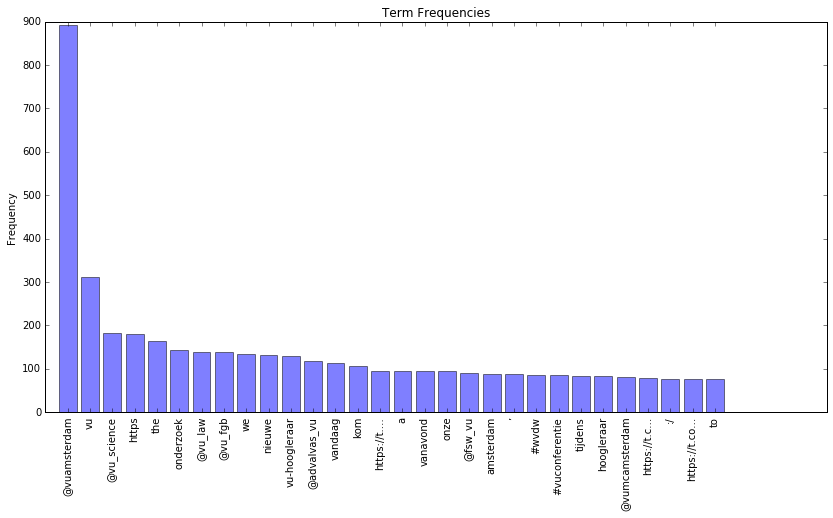

In [23]:
import numpy as np

tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopword_list = stopwords.words('dutch') + punct + ['rt', 'via']

fname = 'user_timeline_VUamsterdam.jsonl'
tf = Counter()
with open(fname, 'r') as f:
    for line in f:
        tweet = json.loads(line)
        tokens = process(text=tweet.get('text', ''),
                         tokenizer=tweet_tokenizer,
                         stopwords=stopword_list)
        tf.update(tokens)
        
    tags = [tag for tag, count in tf.most_common(30)]
    
    #print tags
    y = [count for tag, count in tf.most_common(30)]
    x = range(1, len(y)+1)

    plt.figure(figsize=(14,7), dpi=300)

    plt.bar(x, y, align='center', alpha=0.5)
    plt.title("Term Frequencies")
    plt.ylabel("Frequency")
    plt.xticks(range(1,len(tags)+1), tags, rotation=90)
    plt.savefig('term_distribution.png')

In [24]:
### The same can be done for the hashtags

vuconferentie: 84
wvdw: 84
opendagvu: 74
ech2016: 70
oaj15: 51
diesvu: 51
vu: 45
s4sconference: 42
vuevent: 41
oaj16: 22
sustainability: 21
vumag: 21
cleansea: 19
vumasterdag: 16
zwaartekrachtsgolven: 15
terugkijktip: 15
rio2016: 12
meddeaths: 12
amsterdam: 12
criminologie: 11
aardwetenschappen: 10
actualiteitencollege: 10
vuamsterdam: 10
icc: 10
vumasters: 9
viva400: 8
mismatch: 8
teamnl: 8
vrijheidsmaaltijd: 8
weekendvandewetenschap: 7


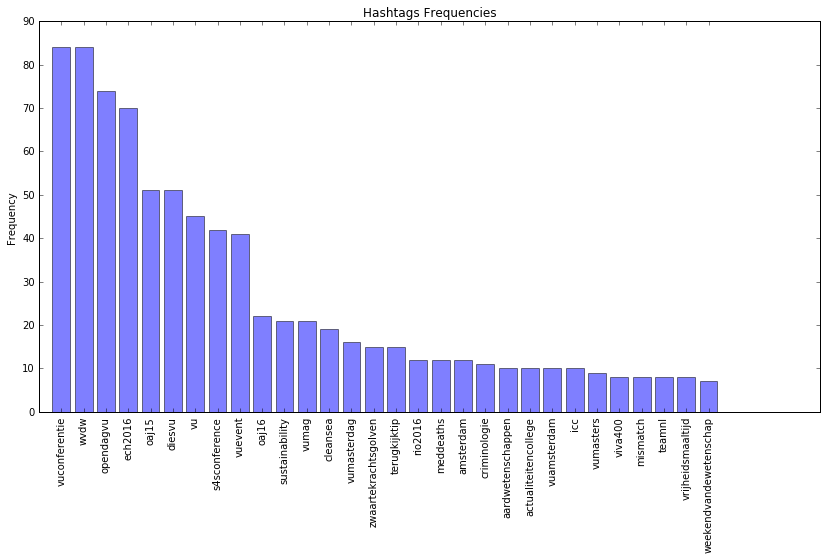

In [25]:
def get_hashtags(tweet):
    entities = tweet.get('entities', {})
    hashtags = entities.get('hashtags', [])
    return [tag['text'].lower() for tag in hashtags]

fname = 'user_timeline_VUamsterdam.jsonl'
with open(fname, 'r') as f:
    hashtags = Counter()
    for line in f:
        tweet = json.loads(line)
        hashtags_in_tweet = get_hashtags(tweet)
        hashtags.update(hashtags_in_tweet)
    for tag, count in hashtags.most_common(30):
        print("{}: {}".format(tag, count))

    tags = [tag for tag, count in hashtags.most_common(30)]
    
    #print tags
    y = [count for tag, count in hashtags.most_common(30)]
    x = range(1, len(y)+1)

    plt.figure(figsize=(14,7), dpi=300)

    plt.bar(x, y, align='center', alpha=0.5)
    plt.title("Hashtags Frequencies")
    plt.ylabel("Frequency")
    plt.xticks(range(1,len(tags)+1), tags, rotation=90)
    plt.savefig('hashtags_distribution.png')

## Activity 2
Change the code above to show the 1000 most common hashtags.

# Streaming

In [36]:
import string
import time
from tweepy import Stream
from tweepy.streaming import StreamListener

In [37]:
def format_filename(fname):
    """Convert fname into a safe string for a file name.

    Return: string
    """
    return ''.join(convert_valid(one_char) for one_char in fname)

In [38]:
def convert_valid(one_char):
    """Convert a character into '_' if "invalid".

    Return: string
    """
    valid_chars = "-_.%s%s" % (string.ascii_letters, string.digits)
    if one_char in valid_chars:
        return one_char
    else:
        return '_'

In [39]:
class CustomListener(StreamListener):
    """Custom StreamListener for streaming Twitter data."""

    def __init__(self, fname):
        safe_fname = format_filename(fname)
        self.outfile = "stream_%s.jsonl" % safe_fname

    def on_data(self, data):
        try:
            with open(self.outfile, 'a') as f:
                f.write(data)
                return True
        except BaseException as e:
            sys.stderr.write("Error on_data: {}\n".format(e))
            time.sleep(5)
        return True

    def on_error(self, status):
        if status == 420:
            sys.stderr.write("Rate limit exceeded\n".format(status))
            return False
        else:
            sys.stderr.write("Error {}\n".format(status))
            return True

In [53]:
query = ['Ireland', 'football']
query_fname = ' '.join(query) # string
auth = get_twitter_auth()
twitter_stream = Stream(auth, CustomListener(query_fname))
twitter_stream.filter(track=query, async=True)

In [54]:
# TO stop your streaming...
twitter_stream.running = False

# Time Series Analysis

In [23]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import pandas as pd
import numpy as np
import pickle

In [55]:
#fname = 'stream_Brasil_Argentina_Mineirao.jsonl'
fname = 'stream_Ireland_football.jsonl'

with open(fname, 'r') as f:
    all_dates = []
    for line in f:
        tweet = json.loads(line)
        all_dates.append(tweet.get('created_at'))
    

In [56]:
ones = np.ones(len(all_dates))
idx = pd.DatetimeIndex(all_dates)
# the actual series (at series of 1s for the moment)
my_series = pd.Series(ones, index=idx)

In [57]:
# Resampling / bucketing into 1-minute buckets
per_minute = my_series.resample('1Min').sum().fillna(0)
print(my_series.head())
print(per_minute.head(30))

2016-11-12 18:38:52    1.0
2016-11-12 18:38:52    1.0
2016-11-12 18:38:52    1.0
2016-11-12 18:38:53    1.0
2016-11-12 18:38:53    1.0
dtype: float64
2016-11-12 18:38:00     37.0
2016-11-12 18:39:00    418.0
2016-11-12 18:40:00    498.0
2016-11-12 18:41:00    510.0
2016-11-12 18:42:00    495.0
2016-11-12 18:43:00    532.0
2016-11-12 18:44:00    310.0
2016-11-12 18:45:00    353.0
2016-11-12 18:46:00    345.0
dtype: float64


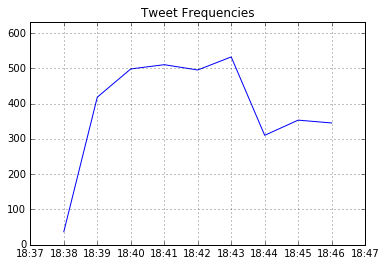

In [59]:
fig, ax = plt.subplots()
ax.grid(True)
ax.set_title("Tweet Frequencies")

hours = mdates.MinuteLocator(interval=1)
date_formatter = mdates.DateFormatter('%H:%M')

datemin = datetime(2016, 11, 12, 18, 37)
datemax = datetime(2016, 11, 12, 18, 47)

ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(date_formatter)
ax.set_xlim(datemin, datemax)
max_freq = per_minute.max()
ax.set_ylim(0, max_freq+100)
ax.plot(per_minute.index, per_minute)

#ax.xticks(rotation=90)

plt.savefig('tweet_time_series.png')

# Users, Followers and Communities

In [60]:
client = get_twitter_client()
profile = client.get_user(screen_name='ericinlinux')
print(json.dumps(profile._json, indent=4))

{
    "follow_request_sent": false, 
    "has_extended_profile": false, 
    "profile_use_background_image": false, 
    "profile_text_color": "000000", 
    "default_profile_image": false, 
    "suspended": false, 
    "id": 40952530, 
    "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme15/bg.png", 
    "verified": false, 
    "translator_type": "none", 
    "profile_location": {
        "full_name": "Amsterdam, The Netherlands", 
        "url": "https://api.twitter.com/1.1/geo/id/99cdab25eddd6bce.json", 
        "country": "", 
        "place_type": "unknown", 
        "bounding_box": null, 
        "contained_within": [], 
        "country_code": "", 
        "attributes": {}, 
        "id": "99cdab25eddd6bce", 
        "name": "Amsterdam, The Netherlands"
    }, 
    "profile_image_url_https": "https://pbs.twimg.com/profile_images/1783085910/perfil1_normal.jpg", 
    "profile_sidebar_fill_color": "000000", 
    "entities": {
        "url": {
        

In [61]:
import time
import math

MAX_FRIENDS = 15000

def paginate(items, n):
    """Generate n-sized chunks from items"""
    for i in range(0, len(items), n):
        yield items[i:i+n]

In [69]:
screen_name = 'ericinlinux'

client = get_twitter_client()
dirname = "users/{}".format(screen_name)
max_pages = math.ceil(MAX_FRIENDS / 5000)

try:
    
    os.makedirs(dirname)
except OSError:
    print("Directory {} already exists".format(dirname))
except Exception as e:
    print("Error while creating directory {}".format(dirname))
    print(e)
    sys.exit(1)

Directory users/ericinlinux already exists


In [70]:
# get followers for a given user
fname = "users/{}/followers.jsonl".format(screen_name)
with open(fname, 'w') as f:
    for followers in Cursor(client.followers_ids, screen_name=screen_name).pages(max_pages):
        for chunk in paginate(followers, 100):
            users = client.lookup_users(user_ids=chunk)
            for user in users:
                f.write(json.dumps(user._json)+"\n")
        if len(followers) == 5000:
            print("More results available. Sleeping for 60 seconds to avoid rate limit")
            time.sleep(60)

# get friends for a given user
fname = "users/{}/friends.jsonl".format(screen_name)
with open(fname, 'w') as f:
    for friends in Cursor(client.friends_ids, screen_name=screen_name).pages(max_pages):
        for chunk in paginate(friends, 100):
            users = client.lookup_users(user_ids=chunk)
            for user in users:
                f.write(json.dumps(user._json)+"\n")
        if len(friends) == 5000:
            print("More results available. Sleeping for 60 seconds to avoid rate limit")
            time.sleep(60)

# get user's profile
fname = "users/{}/user_profile.json".format(screen_name)
with open(fname, 'w') as f:
    profile = client.get_user(screen_name=screen_name)
    f.write(json.dumps(profile._json, indent=4))